# Exploratory Data Analysis
**for AIAP Batch 13 Technical Assessment**

by Choa Hsueh Mei Esther

---
This notebook describes the process of exploratory data analysis (EDA) for the technical assessment project of AIAP Batch 13.

In general, the EDA was done in the following phases:
1. [Data Loading](#data_loading)
2. [Data Cleaning](#data_cleaning)
3. [Feature Engineering](#feature_engineering)
4. [Further Data Analysis](#data_analysis)

## Data Loading <a id='data_loading'></a>
Before any data analysis can be done, the data has to be loaded from the provided sqlite file and converted into a pandas dataframe. Using the sqlalchemy library, the sqlite file is first inspected for its structure:

In [208]:
import pandas as pd
import numpy as np
from src import data_utils

DATA_FILEPATH = "data/failure.db"

data_utils.inspect_data(DATA_FILEPATH)

Available Schemas:
['main']

Tables in Schema [main]:
['failure']

Columns in Table [failure]:

Car ID, TEXT
Model, TEXT
Color, TEXT
Temperature, TEXT
RPM, INTEGER
Factory, TEXT
Usage, TEXT
Fuel consumption, REAL
Membership, TEXT
Failure A, INTEGER
Failure B, INTEGER
Failure C, INTEGER
Failure D, INTEGER
Failure E, INTEGER


From the above, we confirm that the list of attributes specified in the project assessment requirements are present in the sqlite file and is available under the 'failure' table. The data is then loaded into a pandas dataframe:

In [209]:
data = data_utils.load_db(DATA_FILEPATH)
print(f'Original database shape: {data.shape}')
print(f'Original database types:\n{data.dtypes}')


Original database shape: (10081, 14)
Original database types:
Car ID               object
Model                object
Color                object
Temperature          object
RPM                   int64
Factory              object
Usage                object
Fuel consumption    float64
Membership           object
Failure A             int64
Failure B             int64
Failure C             int64
Failure D             int64
Failure E             int64
dtype: object


Simple initial analysis shows that the original data from file 
- contains 10081 row entries, and 14 column features
- contains a fair bit of non-numerical (dtype == object) data. These non-numerical data will need to be addressed later during the data cleaning and feature engineering phases, to be converted and represented by numerical data instead.

## Data Cleaning <a id='data_cleaning'></a>
Before data can be used for any machine learning training, it first has to be free from any errors/artifacts.

In the data cleaning phase, we conduct the following:
1. [check and remove duplicates](#removing_duplicates)
2. [check and process missing values](#removing_nulls)
3. [standardize non-numerical data eg correct spelling errors, standardize casing etc](#standardize_nonnumerical)

### Removing duplicates <a id='#removing_duplicates'></a>
This is achieved by simply calling the available `drop_duplicates` pandas method


In [210]:
data.drop_duplicates(inplace=True)
print(f'Database shape after dropping duplicates: {data.shape}')


Database shape after dropping duplicates: (10000, 14)


The database now has only 10000 rows, as compared to 10081 before - 81 duplicate rows were dropped.

### Removing missing values <a id='#removing_nulls'></a>
Records with missing values in data can either be
- dropped, or
- imputed with some estimated values

We first analyze the data to see how many and what missing values we have before deciding what to be done:

In [211]:
data.isnull().sum()

Car ID                0
Model                 0
Color                 0
Temperature           0
RPM                   0
Factory               0
Usage                 0
Fuel consumption      0
Membership          383
Failure A             0
Failure B             0
Failure C             0
Failure D             0
Failure E             0
dtype: int64

We see that only the 'Membership' data contains null values (383, or 0.04% of records). Further analyzing the Membership data, we observe that, besides the null values, the data consists of only 3 unique values - "Normal", "Premium" and "None". 

At this point of EDA, instead of dropping the records with null Membership values, we assume that we might be able to inpute an estimated category value for them during the Feature Engineering phase.

Instead of leaving null values though, we fill in an interim value of `unrecorded` for future analysis:

In [212]:
print(f'initial Membership statistics:\n{data.Membership.describe()}\n')
print(f'initial Membership values:\n{data.Membership.value_counts()}\n')
data.loc[data.Membership.isnull(), "Membership"] = "unrecorded"
print(f'interim Membership values:\n{data.Membership.value_counts()}\n')
data.isnull().sum()

initial Membership statistics:
count       9617
unique         3
top       Normal
freq        4483
Name: Membership, dtype: object

initial Membership values:
Normal     4483
Premium    3416
None       1718
Name: Membership, dtype: int64

interim Membership values:
Normal        4483
Premium       3416
None          1718
unrecorded     383
Name: Membership, dtype: int64



Car ID              0
Model               0
Color               0
Temperature         0
RPM                 0
Factory             0
Usage               0
Fuel consumption    0
Membership          0
Failure A           0
Failure B           0
Failure C           0
Failure D           0
Failure E           0
dtype: int64

### Standardizing Non-Numerical Data <a id='#standardize_nonnumerical'></a>
The original data contains 7 non-numerical feature data:

In [213]:
object_description = data.describe(include='object')
display(object_description)

for col in ["Model", "Color", "Factory", "Usage", "Membership"]:
    print(f'"{col}" unique values:\n{data[col].value_counts()}\n')
    
print(f'"Temperature" unit values:\n{data.Temperature.str[-3:].value_counts()}')

,Car ID,Model,Color,Temperature,Factory,Usage,Membership
count,10000,10000,10000,10000,10000,10000,10000
unique,10000,41,5,125,6,3,4
top,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 3, 2016",White,110.2 °C,"Shang Hai, China",High,Normal
freq,1,586,5568,785,5478,3527,4483


"Model" unique values:
Model 3, 2016    586
Model 3, 2020    562
Model 3, 2021    560
Model 3, 2012    556
Model 3, 2014    552
Model 3, 2018    541
Model 3, 2019    532
Model 3, 2013    528
Model 3, 2015    526
Model 3, 2017    509
Model 3, 2022    315
Model 5, 2018    314
Model 5, 2020    306
Model 5, 2014    289
Model 5, 2016    288
Model 5, 2012    274
Model 5, 2017    267
Model 5, 2013    263
Model 5, 2015    247
Model 5, 2021    245
Model 5, 2019    244
Model 3, 2011    201
Model 5, 2022    170
Model 7, 2014    103
Model 7, 2016     97
Model 7, 2018     95
Model 7, 2020     94
Model 7, 2015     90
Model 7, 2019     90
Model 7, 2017     88
Model 7, 2012     86
Model 7, 2013     84
Model 7, 2021     84
Model 5, 2011     82
Model 7, 2022     60
Model 3, 2010     31
Model 7, 2011     27
Model 5, 2010      7
Model 7, 2010      5
Model 3, 2009      1
Model 5, 2009      1
Name: Model, dtype: int64

"Color" unique values:
White    5568
Red      1159
Blue     1129
Grey     1086
Black    1

In [214]:
for index in data[data.Temperature.str[-1:] == "F"].index:
    fahrenheit_value = data.loc[index].Temperature[:5]
    celsius_value = f'{(float(fahrenheit_value) - 32) * 5/9:0.1f} °C'
    data.loc[index, "Temperature"] = celsius_value

print(f'"Temperature" unit values:\n{data.Temperature.str[-3:].value_counts()}')

"Temperature" unit values:
 °C    10000
Name: Temperature, dtype: int64


For `Car ID`, it is verified to be unique (count value == unique value). 

For `Model`, `Color`, `Factory`, and `Usage`, since their unique values are small enough, we simply eyeball their values manually to make sure that there are no spelling errors and different letter-casings.

For `Temperature`, we assume that the last 3 letters indicate the temperature unit the reading was recorded in, and confirm that there is a mix of Celsius and Fahrenheit records. Given that there are a smaller number of Fahrenheit records, we proceed to clean the `Temperature` records by doing the following:
1. convert all Fahrenheit readings to Celsius
2. convert `Temperature` records to numerical data by dropping the unit label

In [215]:
for index in data[data.Temperature.str[-1:] == "F"].index:
    fahrenheit_value = data.loc[index].Temperature[:5]
    celsius_value = f'{(float(fahrenheit_value) - 32) * 5/9:0.1f} °C'
    data.loc[index, "Temperature"] = celsius_value

print(f'"Temperature" unit values:\n{data.Temperature.str[-3:].value_counts()}')

data['Temperature'] = data['Temperature'].str[:-3]
data['Temperature'] = data['Temperature'].astype('float')

data.Temperature.describe()

"Temperature" unit values:
 °C    10000
Name: Temperature, dtype: int64


count    10000.000000
mean       113.118580
std          4.670757
min        110.000000
25%        110.400000
50%        111.400000
75%        113.600000
max        230.700000
Name: Temperature, dtype: float64

## Feature Engineering <a id="feature_engineering"></a>
Now that data cleaning has been completed, we will further examine the data to decide for each feature whether any further processing is needed, such as
- keeping or dropping the feature
- transforming the feature eg converting non-numerical to numerical representation
- etc

### Car ID

Given that `Car ID` is unique, this data will be dropped.

### Color
Looking at the `Color` data values, we observe that there are 4 distinct colors that a car might have - White, Red, Blue, Red, Black. As there is no order/ranking between colors, we simply convert `Color` by one hot encoding the values:

In [216]:
data_dummies = pd.get_dummies(data['Color'], prefix='Color')
data = data.join(data_dummies)

# confirm one hot encoded Color values have been added to dataset
data.describe()

,Temperature,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E,Color_Black,Color_Blue,Color_Grey,Color_Red,Color_White
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,113.118580,1470.970100,679.456990,0.025900,0.018500,0.031000,0.024400,0.02640,0.105800,0.112900,0.108600,0.115900,0.556800
std,4.670757,486.047372,58.439696,0.158845,0.134757,0.173326,0.154295,0.16033,0.307597,0.316486,0.311152,0.320121,0.496788
min,110.000000,-2636.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.400000,1418.000000,638.875000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,111.400000,1499.000000,668.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,113.600000,1609.000000,704.200000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,230.700000,2886.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model

Looking at the `Model` data values, we observe that the data seems to be composed of 2 different sub-data:
- `Model Type` eg Model 3, Model 5, Model 7, and
- `Model Year` eg 2019 

These 2 sub-data should be split into their own columns for further processing.

For `Model Type`, given that there are only 3 categorical values (ie Model 3, Model 5, Model 7), we can convert it to a numerical representation by one hot encoding. However, according to the assessment overview description, the model number (ie 3, 5, and 7) is in order of increasing specifications. This suggests that `Model Type` can be encoded as an ordinal variable, by using the model number from the data (ie dropping the 'Model' prefix)

In [217]:
# split 'Model' column data into Model_Type and Model_Year
data[['Model_Type', 'Model_Year']] = data['Model'].str.split(', ', expand=True)

# convert Model_Type to ordinal category by dropping "Model " prefix
data['Model_Type'] = data['Model_Type'].str[-1]
data['Model_Type'] = data['Model_Type'].astype('int')

# convert Model_Year to int to represent as ordinal category
data['Model_Year'] = data['Model_Year'].astype('int')

# display summary of 'Model_Type' and 'Model_Year'
print(f'Final Model Type values:\n{data.Model_Type.value_counts()}\n\n')
print(f'Final Model Year values:\n{data.Model_Year.value_counts()}')

Final Model Type values:
3    6000
5    2997
7    1003
Name: Model_Type, dtype: int64


Final Model Year values:
2016    971
2020    962
2018    950
2014    944
2012    916
2021    889
2013    875
2019    866
2017    864
2015    863
2022    545
2011    310
2010     43
2009      2
Name: Model_Year, dtype: int64


### Usage
Looking at the `Usage` data values, the data is categorized into 3 categories: Low, Medium, High. Given that the feature decribes the owner usage frequency, this suggests that there is an order to the categories ie Low < Medium < High

The `Usage` data can therefore be encoded as an ordinal variable:

In [218]:
print(f'Initial Usage values:\n{data.Usage.value_counts()}\n')

usage_scale = {"Low":1, "Medium":2, "High":3}
data['Usage'] = data['Usage'].apply(lambda x: usage_scale[x])

print(f'Final Usage values:\n{data.Usage.value_counts()}')
    

Initial Usage values:
High      3527
Medium    3335
Low       3138
Name: Usage, dtype: int64

Final Usage values:
3    3527
2    3335
1    3138
Name: Usage, dtype: int64


### Factory
Looking at the `Factory` data values, we observe the following:
- the `Factory` values comprises of `[City], [Country]`
- the factories are sited mainly in 3 countries
  - China
  - Germany
  - U.S
- there are 3 factories in China
  - most of the records come from 1 factory in China (Shang Hai, China - 5478 records)
  - records from the other 2 China factories (Seng Kang, China and Newton, China) make up only 1.5% of the entire dataset 
- there are 2 factories in Germany
  - most of the records come from 1 factory in Germany (Berlin, Germany - 2215 records)
  - records from the other Germany factory (Bedok, Germany) make up only 0.3% of the entire dataset
  
Given that the city representation does not have much statistical weight, we simplify the Factory data to use just the country data. This will reduce the Factory values to just 3 country categories which we can then one hot encode:
  

In [219]:
print(f'Original Factory values:\n{data.Factory.value_counts()}\n')

# split into City and Country values, but keep only the Country value
data.Factory = data.Factory.str.split(', ', expand=True)[1]

print(f'Processed Factory values:\n{data.Factory.value_counts()}')

dummies = pd.get_dummies(data.Factory, prefix='Factory')
data = data.join(dummies)

# confirm one hot encoded factory values have been added to dataset
data.describe()

Original Factory values:
Shang Hai, China    5478
Berlin, Germany     2215
New York, U.S       2127
Seng Kang, China     106
Newton, China         44
Bedok, Germany        30
Name: Factory, dtype: int64

Processed Factory values:
China      5628
Germany    2245
U.S        2127
Name: Factory, dtype: int64


,Temperature,RPM,Usage,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E,Color_Black,Color_Blue,Color_Grey,Color_Red,Color_White,Model_Type,Model_Year,Factory_China,Factory_Germany,Factory_U.S
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,113.118580,1470.970100,2.038900,679.456990,0.025900,0.018500,0.031000,0.024400,0.02640,0.105800,0.112900,0.108600,0.115900,0.556800,4.000600,2016.60630,0.562800,0.224500,0.212700
std,4.670757,486.047372,0.815508,58.439696,0.158845,0.134757,0.173326,0.154295,0.16033,0.307597,0.316486,0.311152,0.320121,0.496788,1.342602,3.20305,0.496065,0.417273,0.409238
min,110.000000,-2636.000000,1.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2009.00000,0.000000,0.000000,0.000000
25%,110.400000,1418.000000,1.000000,638.875000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2014.00000,0.000000,0.000000,0.000000
50%,111.400000,1499.000000,2.000000,668.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2017.00000,1.000000,0.000000,0.000000
75%,113.600000,1609.000000,3.000000,704.200000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,2019.00000,1.000000,0.000000,0.000000
max,230.700000,2886.000000,3.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,2022.00000,1.000000,1.000000,1.000000


### Membership
During the data cleaning phase, all missing values of Membership were assigned as `unrecorded`. We now analyze the data further to see if these `unrecorded` entries can be imputed with a more sensible value.

We note that in the assessment overview's `Membership` description that "Car owners are automatically subscribed with “Normal” membership for the first five years after car purchase". With this in mind, we make the following assumptions:
- business-wise, since subscription allows for complimentary car servicing, it would be detrimental for the business to have not recorded an owner's explicitly subscribed membership
- missing values therefore are assumed to be either (1) an auto-subscribed 'Normal' membership, or (2) no membership at all (None)
- `Model_Year` that was generated during feature engineering of `Model` is assumed to mean the year of manufacture of the model
- we assume that any manufacture year that is within the last 5 years also means within the first 5 years of car purchase
- to determine whether a missing membership is an auto-subscribed or none, we therefore check that `Model_Year` is within the last 5 years and assign the membership value as 'Normal' if so, 'None' otherwise

After we input the missing values, we now have 3 categories of `Membership` (Normal, Premium and None) that we can then one hot encode:

In [220]:
from datetime import date

earliest_year_valid_for_autosubscription = date.today().year - 5
# all unrecorded values that are within first 5 years of purchase are to be imputed with "Normal"
imputed_normal_subscription = (data.Membership == 'unrecorded') & (data.Model_Year > earliest_year_valid_for_autosubscription)
# all unrecorded values that are more than 5 years of purchase are to be imputed with "None"
imputed_none_subscription = (data.Membership == 'unrecorded') & (data.Model_Year <= earliest_year_valid_for_autosubscription)

num_imputed_normal = imputed_normal_subscription.sum()
num_imputed_none = imputed_none_subscription.sum()
print(f'imputed_normal_subscription ({num_imputed_normal}) + imputed_none_subscription ({num_imputed_none}) = {num_imputed_normal+num_imputed_none}\n')

data.loc[imputed_normal_subscription, "Membership"] = "Normal"
data.loc[imputed_none_subscription, "Membership"] = "None"

print(f'Final Membership categories:\n{data.Membership.value_counts()}\n')

data_dummies = pd.get_dummies(data['Membership'], prefix='Membership')
data = data.join(data_dummies)

# confirm one hot encoded Membership values have been added to dataset
data.describe()

imputed_normal_subscription (295) + imputed_none_subscription (88) = 383

Final Membership categories:
Normal     4778
Premium    3416
None       1806
Name: Membership, dtype: int64



,Temperature,RPM,Usage,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E,Color_Black,...,Color_Red,Color_White,Model_Type,Model_Year,Factory_China,Factory_Germany,Factory_U.S,Membership_None,Membership_Normal,Membership_Premium
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,113.118580,1470.970100,2.038900,679.456990,0.025900,0.018500,0.031000,0.024400,0.02640,0.105800,...,0.115900,0.556800,4.000600,2016.60630,0.562800,0.224500,0.212700,0.180600,0.477800,0.34160
std,4.670757,486.047372,0.815508,58.439696,0.158845,0.134757,0.173326,0.154295,0.16033,0.307597,...,0.320121,0.496788,1.342602,3.20305,0.496065,0.417273,0.409238,0.384706,0.499532,0.47427
min,110.000000,-2636.000000,1.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,3.000000,2009.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,110.400000,1418.000000,1.000000,638.875000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,3.000000,2014.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,111.400000,1499.000000,2.000000,668.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,3.000000,2017.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,113.600000,1609.000000,3.000000,704.200000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,5.000000,2019.00000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,230.700000,2886.000000,3.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,7.000000,2022.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Failure A/B/C/D/E
The assessment overview's problem statement states that the objective is to "predict the occurrence of car failure". We assume this to mean a simple binary classification of 0 - no car failure, and 1 - has car failure.

In the given dataset however, we have multi-class categories of failures instead - `Failure A`, `Failure B`, `Failure C`, `Failure D` and `Failure E`

We therefore engineer a new feature data called `Had_Failure` to serve as the target of our machine learning pipeline, where as long as one of Failure A/B/C/D/E is identified, `Had_Failure` is also true

In [221]:
target_columns = ['Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E']
data['Had_Failure'] = np.where(data[target_columns].sum(axis='columns') > 0, 1, 0)
data[['Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E', 'Had_Failure']].head()

,Failure A,Failure B,Failure C,Failure D,Failure E,Had_Failure
0,0,0,0,0,0,0
1,1,0,0,0,0,1
2,0,0,0,0,0,0
3,1,0,0,0,0,1
4,0,1,0,0,0,1


<AxesSubplot:xlabel='Had_Failure', ylabel='count'>

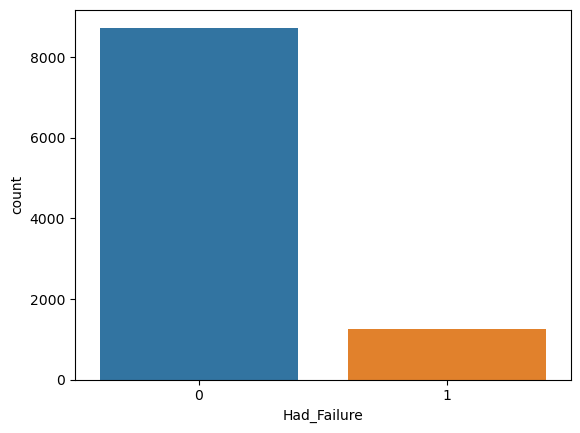

In [222]:
import seaborn as sns

sns.countplot(x=data['Had_Failure'])

## Further Data Analysis <a id="data_analysis"></a>
At this point, all non-numerical data has been processed and converted to either ordinal or one-hot encoded categorical data. There is still the continuous data of `Temperature`, `RPM` and `Fuel consumption` to further analyze for artifacts like outliers etc. We plot a histogram to visually examine the distribution of each of these features:

Records with Temperature > 150C: 1
Records with RPM < 0: 220


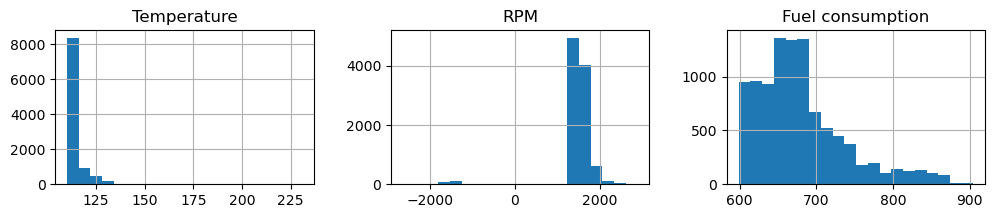

In [223]:
chart = data[["Temperature","RPM","Fuel consumption"]].hist(bins=20, layout=(1,3), figsize=(12,2))
print(f'Records with Temperature > 150C: {len(data[data.Temperature > 150])}')
print(f'Records with RPM < 0: {len(data[data.RPM < 0])}')


From above we observe the following:
- all 3 features are skewed. we will want to standardize them just before the training phase to help the machine learning algorithms perform better
- `Temperature` has 1 outlier record. To prevent it from affecting the standarization processing later, we should remove it
- `RPM` has records that are less than zero! Given that `RPM` indicates the average 30 days maximum torque speed, a negative value does not seem right. However, at this point of submission, we had a lack of time to properly investigate how we should deal with these negative `RPM` values, and have simply dropped it so that it does not affect the machine learning training and prediction later

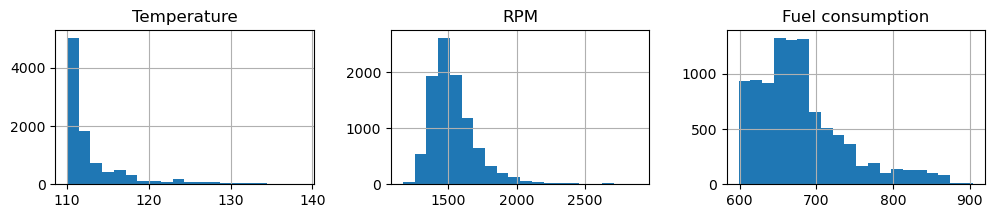

In [224]:
# drop outlier Temperature and RPM records
data = data[data.Temperature < 150]
data = data[data.RPM > 0]
chart = data[["Temperature","RPM","Fuel consumption"]].hist(bins=20, layout=(1,3), figsize=(12,2))

<AxesSubplot:xlabel='Usage', ylabel='Had_Failure'>

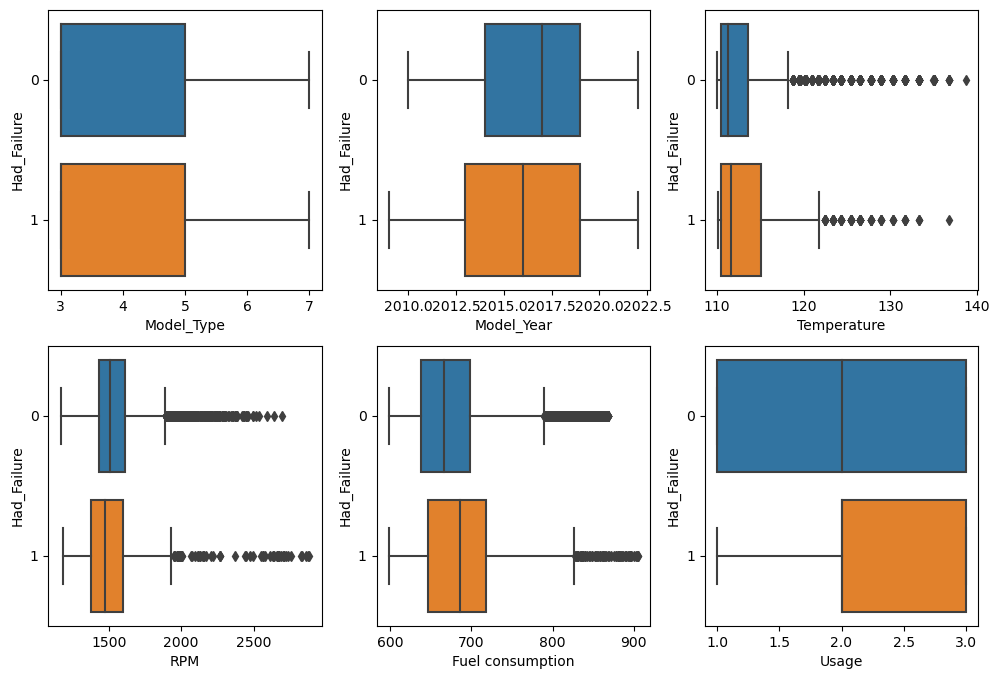

In [225]:
import matplotlib.pyplot as plt

# for col in data.select_dtypes(include='object'):
#     if data[col].nunique() <= 22:
#         sns.countplot(y=col, data=data)
#         plt.show()

f, axes = plt.subplots(2, 3, figsize=(12,8))
sns.boxplot(y = data['Had_Failure'].astype('category'), x = "Model_Type", data=data, ax=axes[0,0])
sns.boxplot(y = data['Had_Failure'].astype('category'), x = "Model_Year", data=data, ax=axes[0,1])
sns.boxplot(y = data['Had_Failure'].astype('category'), x = "Temperature", data=data, ax=axes[0,2])
sns.boxplot(y = data['Had_Failure'].astype('category'), x = "RPM", data=data, ax=axes[1,0])
sns.boxplot(y = data['Had_Failure'].astype('category'), x = "Fuel consumption", data=data, ax=axes[1,1])
sns.boxplot(y = data['Had_Failure'].astype('category'), x = "Usage", data=data, ax=axes[1,2])


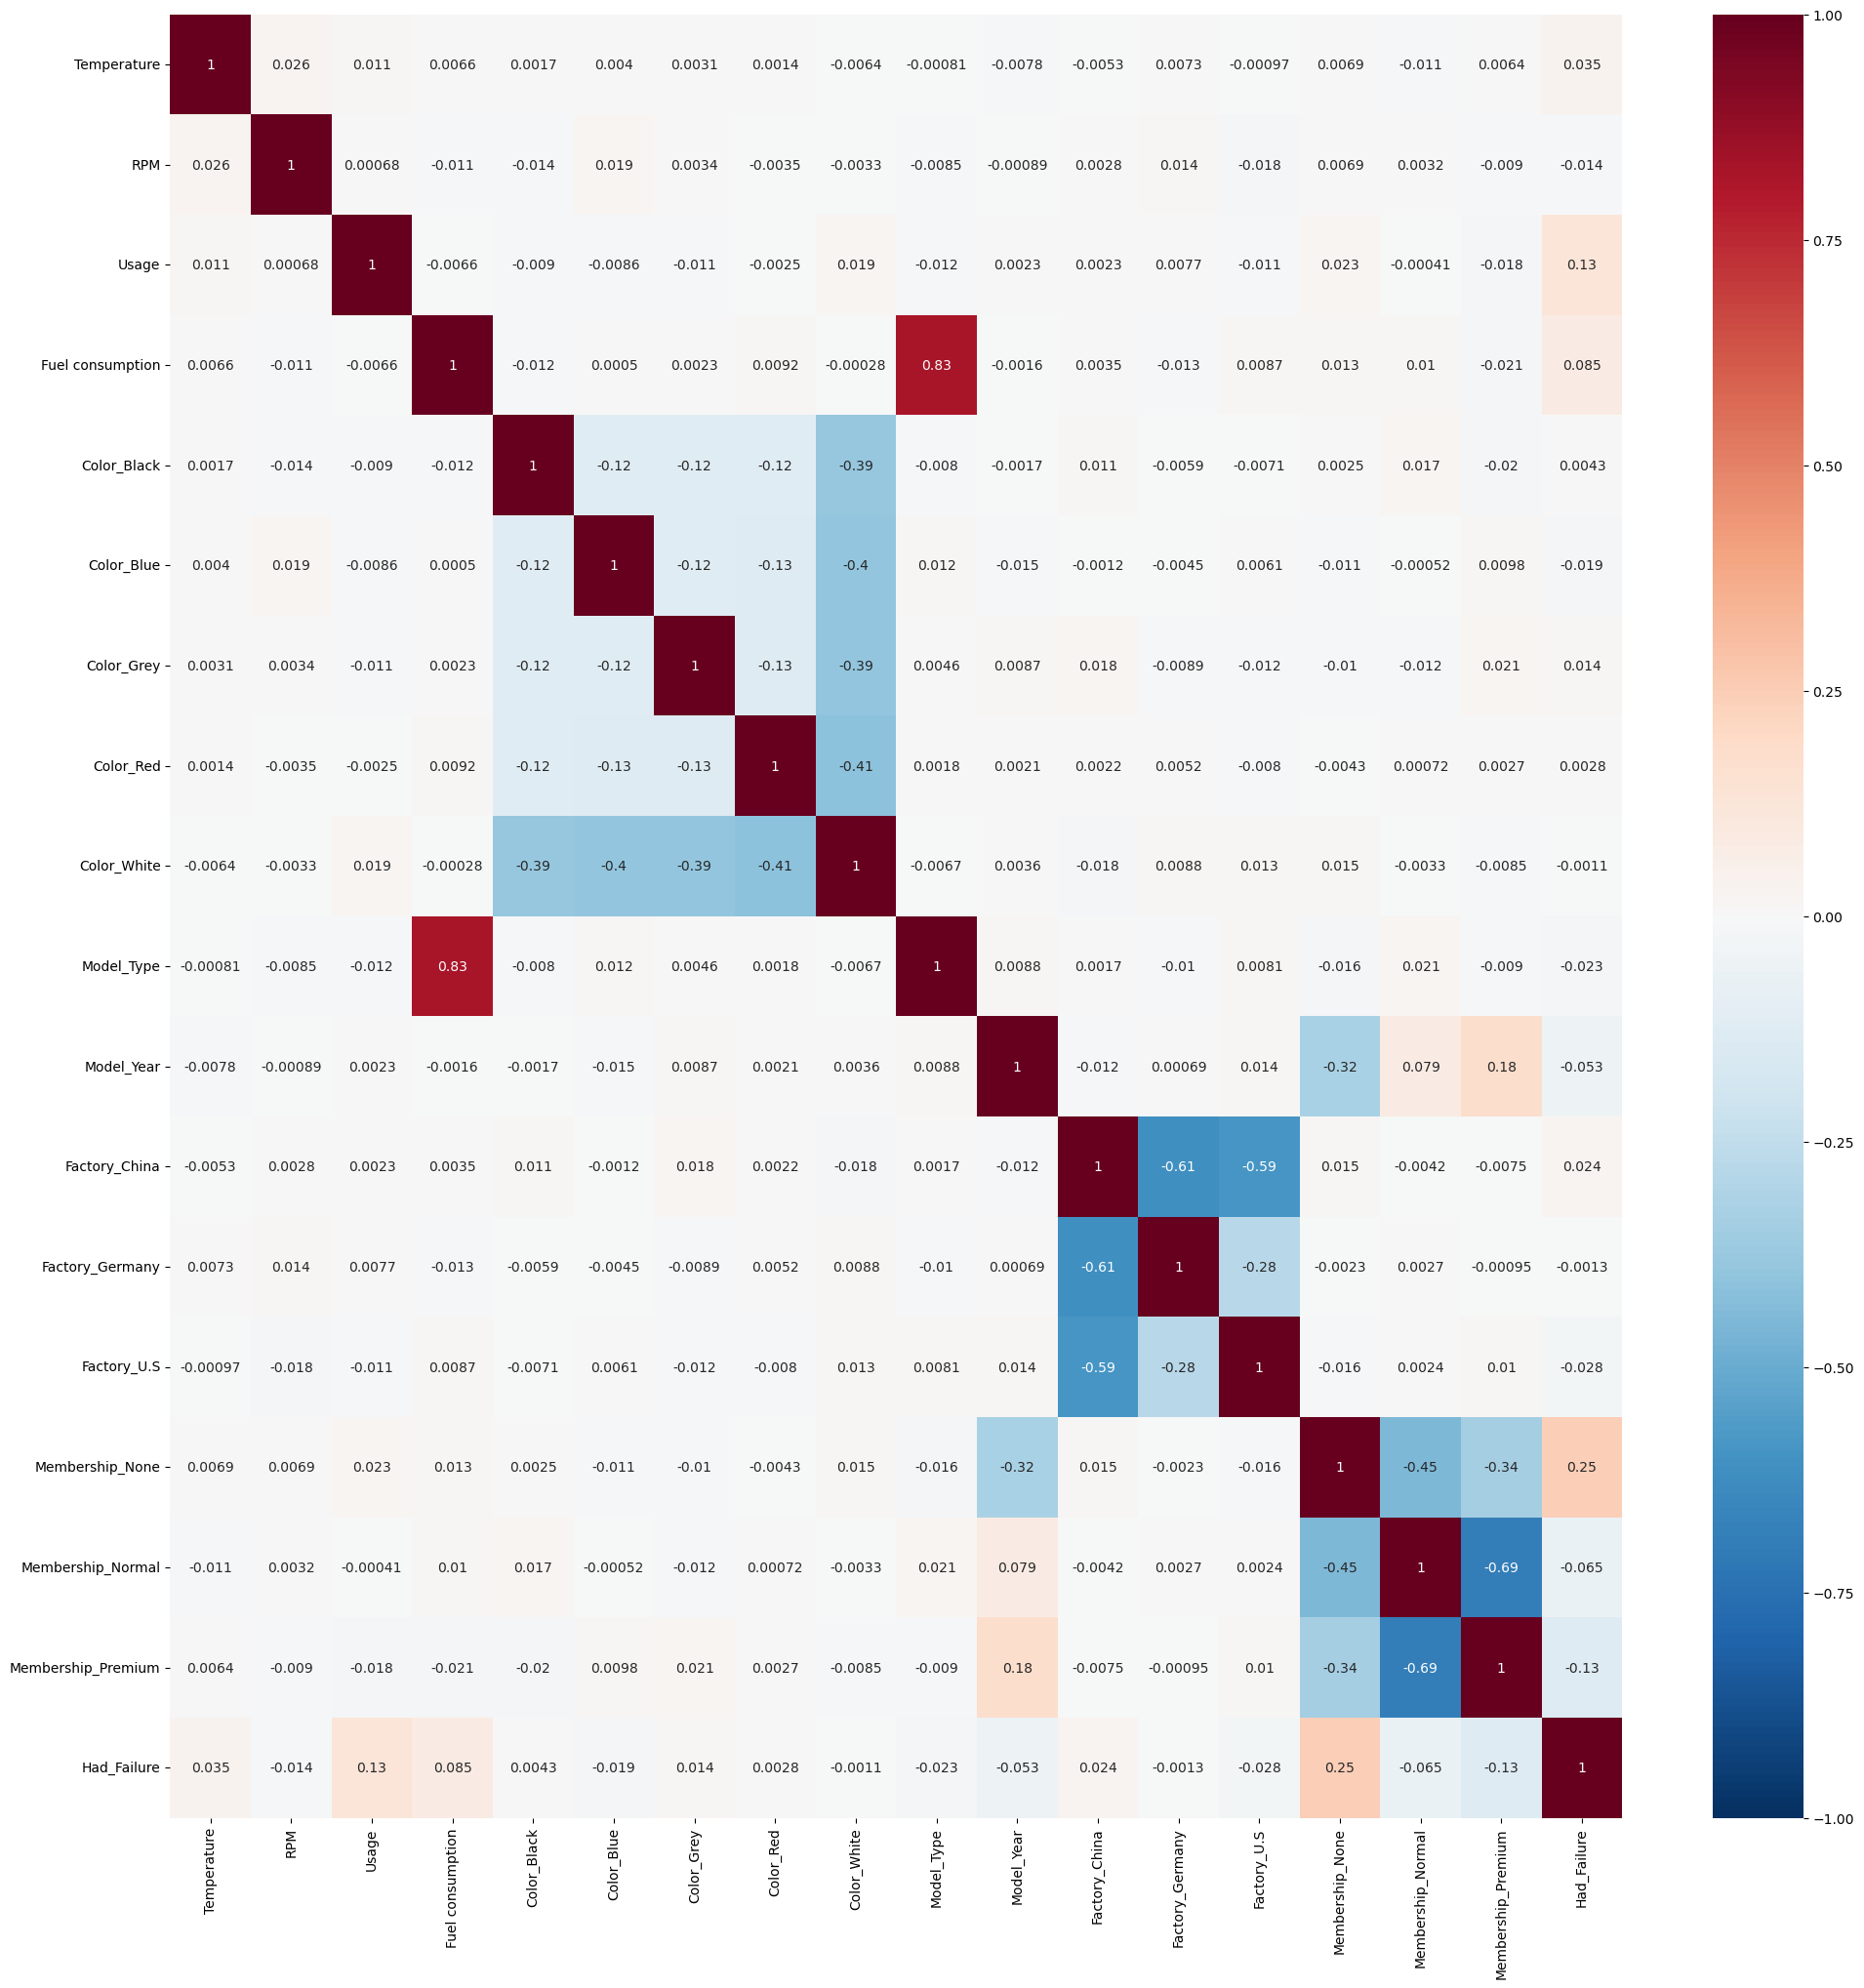

In [226]:
plt.figure(figsize=(24,24))
sns.heatmap(data.drop(["Failure A", "Failure B", "Failure C", "Failure D", "Failure E"], axis=1).corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

## Summary
The following table provides a summary of original data loaded from the given sqlite database, and data preprocessing actions done for each feature:
**Original Features**

| Attribute         | Description                                                                    | Processing Done                                                                                                                                                                                                                     |
|:-------------------|:--------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car ID            | Car unique ID                                                                  | No processing done, to be dropped                                                                                                                                                                                                                             |
| Model             | Car model 3, 5, and 7 <br>(in the order of increasing specifications)          | Processed to generate 2 additional sub-data:<br>Model_Type - encoded as ordinal (3,5,7)<br>Model_Year - assumed as year of manufacture                                                                                              |
| Color             | Color of car                                                                   | One hot encoded as categorical (Color_White, Color_Red, Color_Blue, Color_Grey, Color_Black)                                                                                                                                                                                                                              |
| Temperature       | Average 30 days temperature of the car engine before failure detected          | Standardised Fahrenheit entries to Celsius, and then converted to continuous numerical value<br>Removed 1 outlier record                                                                                                            |
| RPM               | Average 30 days maximum torque speed at maximum torque before failure detected | Removed 220 -ve value records                                                                                                                                                                                                       |
| Factory           | Manufacturing origin of car                                                    | Processed to keep only country info and then one hot encoded as categorical<br>(Factory_China, Factory_Germany, Factory_U.S)                                                                                                        |
| Usage             | Owner usage frequency of car                                                   | Encoded as ordinal<br>Low => 1<br>Medium => 2<br>High => 3                                                                                                                                                                          |
| Fuel consumption  | Fuel consumption of car in Litre/KM                                            | No processing done                                                                                                                                                                                                                  |
| Membership        | Type of membership subscripted                                                 | Missing values were imputed based on Model_Year<br>if Model_Year > 5 years ago => None<br>if Model_Year < 5 years => Normal<br><br>and then one hot encoded as categorical (Membership_None, Membership_Normal, Membership_Premium) |
| Failure A/B/C/D/E | Type of car failure                                                            | Failure A,B,C,D and E data combined used to impute overall new data Had_Failure                                                                                                                                                     |

From the post-processed data, we extract the following subset of feature data to be used for our subsequent machine learning training and prediction:

**Final post-processed Features for ML training and prediction**

| Attribute          | Description                                                                                                                             |
|:--------------------|:-----------------------------------------------------------------------------------------------------------------------------------------|
| Model_Type         | Car model - indicated with ordinal values 3, 5, and 7 <br>(in the order of increasing specifications)                                   |
| Model_Year         | Assumed year of manufacture of Car model                                                                                                |
| Temperature        | Average 30 days temperature of the car engine before failure detected, in Celsius                                                       |
| RPM                | Average 30 days maximum torque speed at maximum torque before failure detected                                                          |
| Fuel consumption   | Fuel consumption of car in Litre/KM                                                                                                     |
| Usage              | Owner usage frequency of car - indicated with ordinal values 1, 2 or 3, where<br>1 => Low usage<br>2 => Medium usage<br>3 => High usage |
| Color_White        | One hot encoded variable that indicates if car is White<br>'1' if it is, '0' otherwise                                                  |
| Color_Red          | One hot encoded variable that indicates if car is Red<br>'1' if it is, '0' otherwise                                                    |
| Color_Blue         | One hot encoded variable that indicates if car is Blue<br>'1' if it is, '0' otherwise                                                   |
| Color_Grey         | One hot encoded variable that indicates if car is Grey<br>'1' if it is, '0' otherwise                                                   |
| Color_Black        | One hot encoded variable that indicates if car is Black<br>'1' if it is, '0' otherwise                                                  |
| Factory_China      | One hot encoded variable that indicates if origin of car is from China<br>'1' if it is, '0' otherwise                                   |
| Factory_Germany    | One hot encoded variable that indicates if origin of car is from Germany<br>'1' if it is, '0' otherwise                                 |
| Factory_U.S        | One hot encoded variable that indicates if origin of car is from U.S<br>'1' if it is, '0' otherwise                                     |
| Membership_Normal  | One hot encoded variable that indicates if owner subscripted a "Normal" membership plan<br>1' if it is, '0' otherwise                   |
| Membership_Premium | One hot encoded variable that indicates if owner subscripted a "Premium" membership plan<br>1' if it is, '0' otherwise                  |
| Membership_None    | One hot encoded variable that indicates if owner has no subscription to any membership plan<br>1' if none, '0' otherwise                |

In [227]:
final_features = ["Model_Type", "Model_Year", "Temperature", "RPM", "Fuel consumption", "Usage", 
                  "Color_White", "Color_Red", "Color_Blue", "Color_Grey", "Color_Black",
                  "Factory_China", "Factory_Germany", "Factory_U.S", 
                  "Membership_Normal", "Membership_Premium", "Membership_None"]

data_features = data[final_features]
display(data_features.head())

,Model_Type,Model_Year,Temperature,RPM,Fuel consumption,Usage,Color_White,Color_Red,Color_Blue,Color_Grey,Color_Black,Factory_China,Factory_Germany,Factory_U.S,Membership_Normal,Membership_Premium,Membership_None
0,5,2022,110.3,1551,659.7,2,0,0,1,0,0,1,0,0,1,0,0
1,3,2022,110.4,1408,705.3,2,0,0,0,0,1,1,0,0,0,1,0
2,3,2022,110.3,1498,670.7,1,0,0,0,1,0,1,0,0,0,1,0
3,3,2022,110.4,1433,630.6,3,0,0,0,0,1,0,1,0,0,1,0
5,5,2021,110.3,1425,691.8,2,1,0,0,0,0,1,0,0,0,1,0


We also extract the engineered feature `Had_Failure` to use as the targets for our subsequent machine learning training and prediction:

In [228]:
data_targets = data["Had_Failure"]
print(data_targets[:5])

0    0
1    1
2    0
3    1
5    0
Name: Had_Failure, dtype: int64


In [229]:
%%html
<style>
table {float:left}
</style>